# Project 1: Edge Detection/Hough Transform

### What to Submit
Submit this iPython Notebook--containing all your code for the programming exercises below--on [learning suite](https://learningsuite.byu.edu/).

Your notebook file should produce the relevant plots and also provide a short write-up with answers to the questions in parts A-B.

Please also fill in here the time that each part took you:
* A1. Gradient Magnitude: <span style="color:red;">About 1 hour</span>
* A2. Gradient Orientation: <span style="color:red;">About 45 minutes</span>
* A3. Laplacian Zero-crossings: <span style="color:red;">About 45 minutes</span>
* A4. Gradient Magnitude + Zero-crossings: <span style="color:red;">About 30 minutes</span>
* B. Hough Transform (Circles):  <span style="color:red;">About 7 hours</span>

Note that the images referred to and needed for this project are contained in the zip file provided (in the same directory as this notebook file).  <i>Please use the files as though they are in the same directory.  We will drop your notebook file into our folder and run it.</i>

### Programming Exercises
Make sure to read through all of the assignment and plan accordingly.  The first part is relatively easy, but you should allow adequate time for the second part.

The main goal is to investigate edge detection and the Hough transform as discussed in Sections 4.2 and 4.3 of [Szeliski](http://szeliski.org/Book "Computer Vision: Algorithms and Applications").

#### Part A: Edge Detection (32 points)
For each of the following four parts, try out your code first on the <span style="color:orange;">2D_White_Box.png</span> image, then on the more complicated <span style="color:orange;">blocks.png</span> image.

Note: Many of the images will contain negative numbers or numbers larger than 255.  Make sure you approprately scale the output images to display all of the information.  Hint: try mapping negative values to [0,128) and positive values to (128,255].

2D_White_Box.png:
![alt 2D_White_Box.png](2D_White_Box.png)

blocks.png:
![alt blocks.png](blocks.png)

<br><br><b>A1. Gradient Magnitude</b> - Compute the gradient magnitude image for a grayscale image.  Apply a suitable threshold to find edge points--play with the threshold to find the "best" solution.  How well does this seem to work?  Feel free to use any preprocessing you wish to prior to edge detection.

In [597]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [598]:
# helpers and imports

import numpy as np # this is so that you can see which functions come from the numpy library
import matplotlib.pyplot as plt # this is so that you can see which functions come from the pyplot library
plt.rcParams['figure.figsize'] = [15,8]
plt.rcParams['axes.titlesize'] = '16'
plt.rcParams['axes.titleweight'] = 'bold'

import cv2
from scipy import ndimage

def just_title(title):
    a = plt.gca()
    a.set_title(title, fontdict={'fontsize': rcParams['axes.titlesize'],
                                 'fontweight' : rcParams['axes.titleweight'],
                                 'verticalalignment': 'baseline',
                                 'horizontalalignment': 'center'})
    a.set_xticks([])
    a.set_yticks([])

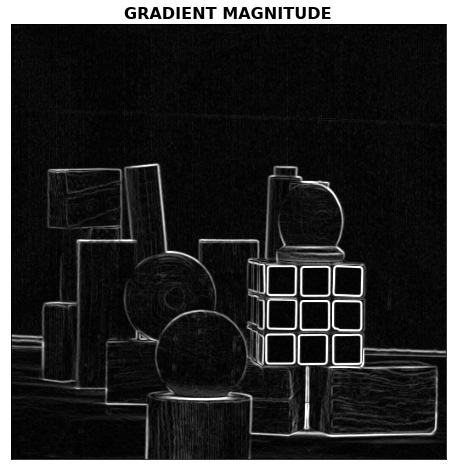

In [599]:
# Part 1. Compute the Gradient Magnitude

def grad_mag(image, threshold=100):
    
#     image = cv2.GaussianBlur(image, (5, 5), cv2.BORDER_DEFAULT)
    image = image.astype(np.float64)
    
    x = ndimage.convolve(image, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
    y = ndimage.convolve(image, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
    
    result = np.hypot(x, y)
    
    result = np.absolute(result)
    
    if threshold >= 0:
        result = (result >= threshold)
    
    return result

# Show your results on the blocks image

# img = cv2.imread('2D_White_Box.png')
img = cv2.imread('blocks.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mag = grad_mag(img, threshold=-1)
plt.imshow(mag, cmap="gray", vmin=0, vmax=400)
just_title("GRADIENT MAGNITUDE")

plt.show()

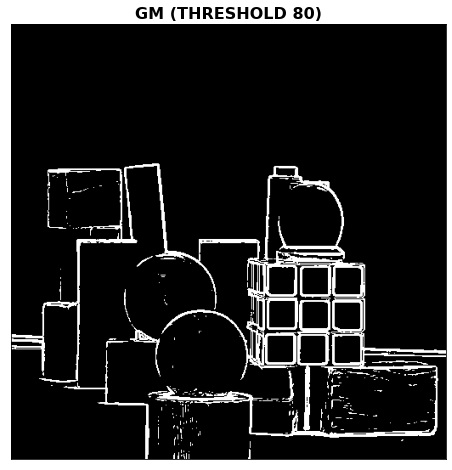

In [600]:
th = 80
mag2 = grad_mag(img, threshold=th)
plt.imshow(mag2, cmap="gray", vmin=0, vmax=1)
just_title(f"GM (THRESHOLD {th})")

plt.show()

<br><b>A2. Gradient Orientation</b> - Compute a gradient orientation image for a grayscale image.  Encode the orientations as intensity using any method you wish. (Just make sure to document it.)  Hint: use atan2(), not atan(), to do the angle calculation.

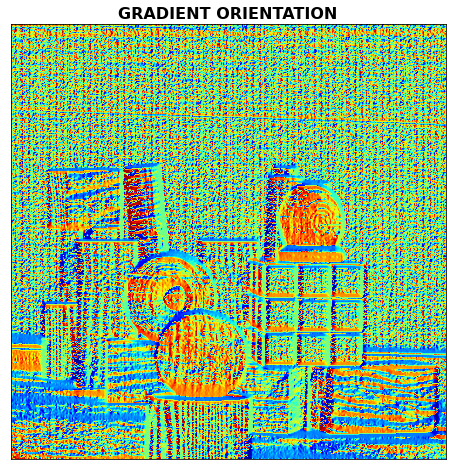

In [601]:
# Part 2. Compute the Gradient Orientation

import math

def grad_ori(image):
    
#     image = cv2.GaussianBlur(image, (5, 5), cv2.BORDER_DEFAULT)
    image = image.astype(np.float64)
    
    gx = ndimage.convolve(image, np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]))
    gy = ndimage.convolve(image, np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]))
    
#     gx = (gx >= 100) * gx
#     gy = (gy >= 100) * gy
    
    result = image.copy()
    
    for i in range(len(result)):
        for j in range(len(result[i])):
            result[i][j] = math.atan2(gy[i][j], gx[i][j])
    
    return result


# Show your results on the blocks image

# img = cv2.imread('2D_White_Box.png')
img = cv2.imread('blocks.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.subplot(121)
# plt.imshow(img, cmap="gray", vmin=0, vmax=255)
# just_title("BLOCKS")

ori = grad_ori(img)
# plt.subplot(122)
plt.imshow(ori, cmap="jet", vmin=(math.pi * -1), vmax=math.pi)
just_title("GRADIENT ORIENTATION")

plt.show()

# oriented up: ORANGE
# oriented down: BLUE
# oriented left: GREEN
# oriented right: DARK RED

<br><b>A3. Laplacian Zero-Crossings</b> - Apply a 3x3 Laplacian kernel to blocks and find the zero crossings.



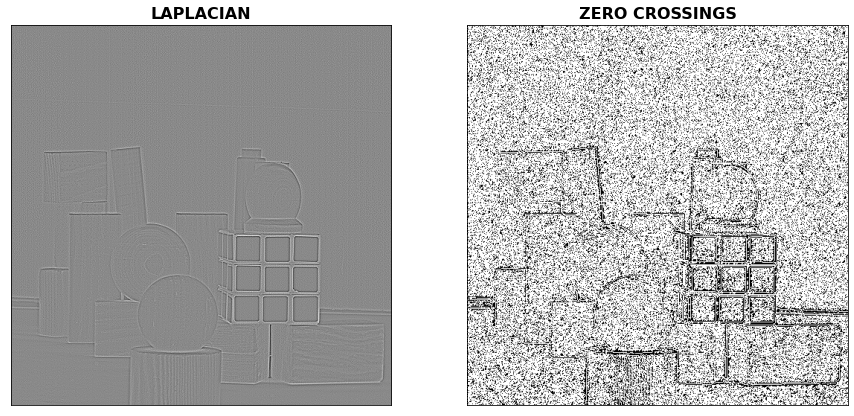

In [602]:
# Part 3. Find the Zero Crossings

def laplacian(image):
    
#     image = cv2.GaussianBlur(image, (5, 5), cv2.BORDER_DEFAULT)
    image = image.astype(np.float64)
    
    result = ndimage.convolve(image, np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]))
    
    return result


# should pass in a laplacian
def zero_crossings(image):
    result = image.copy()
    
    for i in range(len(image)):
        if i == 0:
            continue
        for j in range(len(image[i])):
            if j == 0:
                continue
            if image[i][j] * image[i-1][j] < 0 or image[i][j] * image[i][j-1] < 0:
                result[i][j] = 1
            else:
                result[i][j] = 0
                
    return result



# Show the results on blocks image

# img = cv2.imread('2D_White_Box.png')
img = cv2.imread('blocks.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

l = laplacian(img)
plt.subplot(121)
plt.imshow(l, cmap="gray", vmin=-168, vmax=144)
just_title("LAPLACIAN")

z = zero_crossings(l)
plt.subplot(122)
plt.imshow(z, cmap="gray", vmin=0, vmax=1)
just_title("ZERO CROSSINGS")

plt.show()

<br><b>A4. Combine Gradient Magnitude and Zero-Crossings</b> - Use the gradient magnitude image computed in item 1 to select Laplacian zero-crossings in part 3 that correspond to points with gradients higher than some threshold that you determine.  Adjust your threshold to find the best solution.


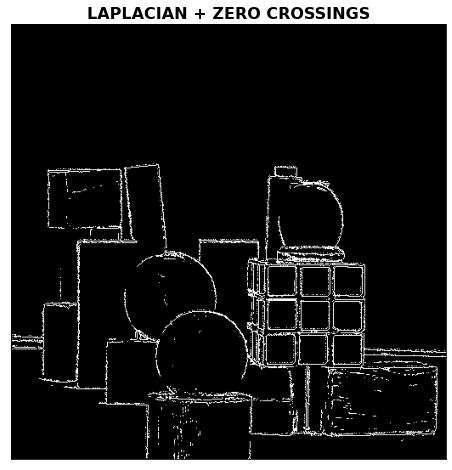

In [603]:
# Part 4. Final Solution

th = 80
def combine(image):
    mag = grad_mag(image, threshold=th)
    zc = zero_crossings(laplacian(image))

    result = image.copy()

    for i in range(len(image)):
        for j in range(len(image[i])):
            if zc[i][j] == 1:
                result[i][j] = mag[i][j]
            else:
                result[i][j] = 0
    return result



# Show the results on blocks image

# img = cv2.imread('2D_White_Box.png')
img = cv2.imread('blocks.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

final = combine(img)

plt.imshow(final, cmap="gray", vmin=0, vmax=1)
just_title("LAPLACIAN + ZERO CROSSINGS")

plt.show()

##### Part A: Write-up

<span style="color:red">I think my results are looking pretty good. For the gradient magnitude section, it took me a second to realize that the x and y kernels need to be combined with np.hypot instead of simply adding. Once I did that, all my results improved greatly.</span>

<span style="color:red">For zero-crossings, I decided to look at each pixel, and set it to 1 only if the pixel to the left or the pixel above has a different sign than it. I use multiplication to determine this, knowing that the product of two numbers with different signs will always be negative. All my other implementations are fairly straightforward.</span>



<br><br><br>
#### Part B: Hough Transform (68 points)
Use the Hough transform to find all of the circular shapes in a color image.  They occur in three (approximate) sizes: 32, 64, and 96 pixels in diameter.  Try it out first on the simple <span style="color:orange;">simplecircle.png</span> image, then on the more complicated <span style="color:orange;">circles.png</span> image.

After finding maxima in the accumulator(s), write out a list of positions and sizes (small, medium, or large) for each circle.  Be aware that for some of the circles the center is outside the image--you should still be able to identify where it is.

Some of the cases are tricky--don't panic if you don't get them all at first. Keep trying to get as many as possible while generatign as few possible false positives (erroneous identifications).

About 40 of the 68 points will be on how many of the circles you can detect (1-2 false positives are okay). To know what you should be shooting for, there are:
* 5 small circles (blue/cyan, light gray, purple clipped on the left, two eyes of the pumpkin).
* 12 medium circles (green one in the top left corner, orange/magenta/pink near top/left, yello, magenta, purple/cyan, medium grey in "target", med blue clipped on the left, red/white/blue on lower right).
* 3 Large circles (black in target, black/dark blue on right, and orange pumpkin).

For the <span style="color:orange;">circles.png</span> file, and each of the 3 diameters, show (1) the accumulation array and (2) the <span style="color:orange;">circles.png</span> with the detected circles outlined.  This would be a total of 6 figures (3 diameters with two plots each).

This will be graded based on how well your method performs and how innovative your solution is. **In the write-up, describe any improvements/optimizations you made from the vanilla Hough transform**.

simplecircle.png:
![alt simplecircle.png](simplecircle.png)
circles.png:
![alt circles.png](circles.png)

In [604]:
# Part B - Hough Transform - code below

# circle masks to be "stamped" onto the accumulator

circle_16 = np.zeros([33, 33], dtype=int)
circle_16 = cv2.circle(circle_16, (16, 16), 16, 1, 1)

circle_32 = np.zeros([65, 65], dtype=int)
circle_32 = cv2.circle(circle_32, (32, 32), 32, 1, 1)

circle_48 = np.zeros([97, 97], dtype=int)
circle_48 = cv2.circle(circle_48, (48, 48), 48, 1, 1)

In [605]:
class Accumulator:
    def __init__(self, r, image):
        if r not in [16, 32, 48]:
            print("ABORT! Invalid r.")
        self.r = r
        self.image = image
        self.data = np.zeros([image.shape[0] + 2 * r, image.shape[1] + 2 * r], dtype=np.float64)
        self.centers = []
        self.m = None
        
    def accumulate(self):
        # input image should be a binary image of edges
        for i in range(len(self.image)):
            for j in range(len(self.image[i])):
                if self.image[i][j] > 0:
                    # increment accumulator in circle around image[i]
                    if self.r == 16:
                        self.data[i:i+self.r*2+1, j:j+self.r*2+1] += circle_16
                    elif self.r == 32:
                        self.data[i:i+self.r*2+1, j:j+self.r*2+1] += circle_32
                    elif self.r == 48:
                        self.data[i:i+self.r*2+1, j:j+self.r*2+1] += circle_48
                        
        # adjust guesses near the edges
        # values at the edge of the original image are doubled, values at the far edge are tripled
        for i in range(self.r*2):
            self.data[:, i] *= (3*self.r - i) / self.r
            self.data[:, (-1*i)-1] *= (3*self.r - i) / self.r
                        
    def find_maximum(self):
        # finds just one local maximum (circle center)
        if self.m is None:
            k = np.array([[-1, -1, -1, -1, -1],
                          [-1, 1, 1, 1, -1],
                          [-1, 1, 8, 1, -1],
                          [-1, 1, 1, 1, -1],
                          [-1, -1, -1, -1, -1]])
            self.m = ndimage.convolve(self.data, k)
        
        max_val = -1
        max_loc = (-1, -1)
        for i in range(len(self.m)):
            for j in range(len(self.m[i])):
                if self.m[i][j] > max_val:
                    max_val = self.m[i][j]
                    max_loc = (j, i)
        
        self.centers.append(max_loc)
        self.m = cv2.circle(self.m, max_loc, 5, 0, -1)

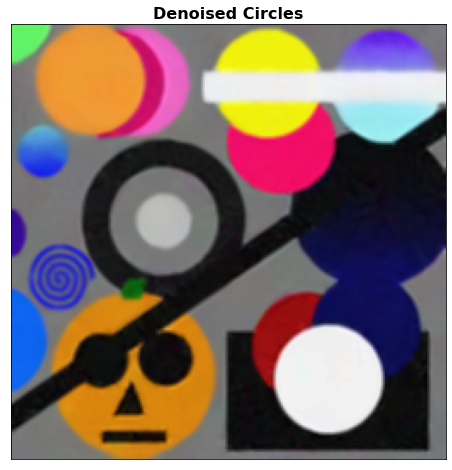

In [606]:
circles = cv2.imread("circles.png")
circles = circles[:,:,::-1]
img = cv2.GaussianBlur(circles, (3, 3), cv2.BORDER_DEFAULT)
img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

plt.imshow(img)
just_title("Denoised Circles")

plt.show()

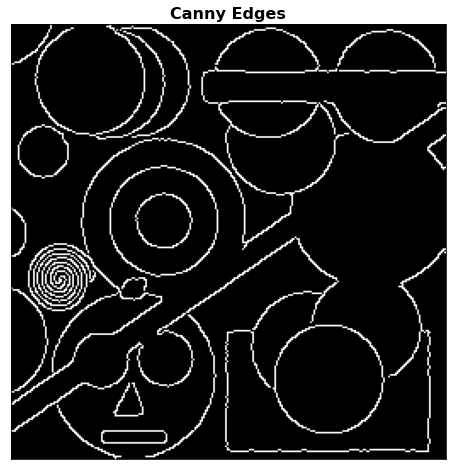

In [607]:
canny = cv2.Canny(image=img, threshold1=100, threshold2=200)

plt.imshow(canny, cmap="gray")
just_title("Canny Edges")

plt.show()

Centers: [(9, 139), (106, 131), (107, 213), (68, 214), (276, 253), (35, 91)]


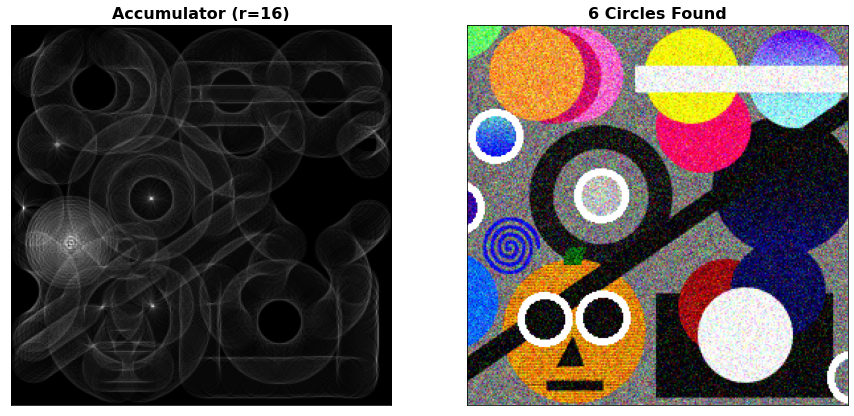

In [608]:
# Be sure to show all of the figures required in the description above

# SMALL CIRCLES
r = 16

a_16 = Accumulator(r, canny)
a_16.accumulate()

num_centers = 6
for _ in range(num_centers):
    a_16.find_maximum()
print("Centers:", a_16.centers)

f_img = circles.copy()
for c in a_16.centers:
    f_img = cv2.circle(f_img, (c[0]-r, c[1]-r), r, (255, 255, 255), 3)

plt.subplot(121)
plt.imshow(a_16.data, cmap="gray", vmin=0, vmax=60)
just_title(f"Accumulator (r={r})")

plt.subplot(122)
plt.imshow(f_img)
just_title(f"{len(a_16.centers)} Circles Found")

plt.show()

# finds all 5 in 6 guesses (1 false positive)!

Centers: [(21, 217), (121, 147), (219, 241), (78, 65), (183, 67), (190, 100), (105, 66), (205, 221), (90, 67), (241, 210), (25, 24), (252, 67)]


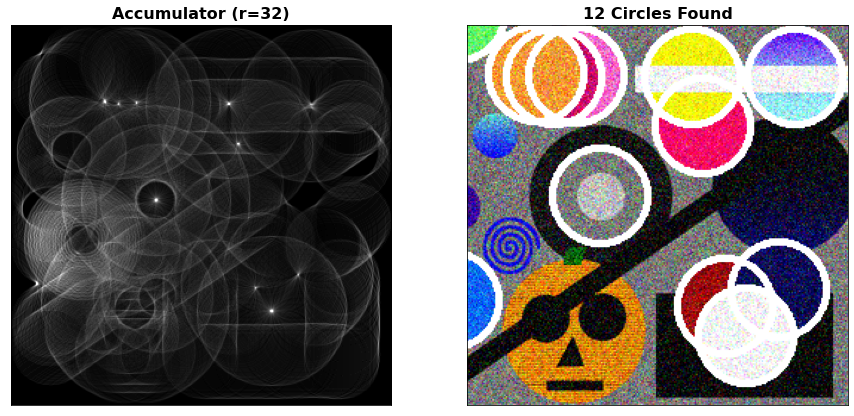

In [609]:
# MEDIUM CIRCLES
r = 32

a_32 = Accumulator(r, canny)
a_32.accumulate()

num_centers = 12
for _ in range(num_centers):
    a_32.find_maximum()
print("Centers:", a_32.centers)

f_img = circles.copy()
for c in a_32.centers:
    f_img = cv2.circle(f_img, (c[0]-r, c[1]-r), r, (255, 255, 255), 3)

plt.subplot(121)
plt.imshow(a_32.data, cmap="gray", vmin=0, vmax=80)
just_title(f"Accumulator (r={r})")

plt.subplot(122)
plt.imshow(f_img)
just_title(f"{len(a_32.centers)} Circles Found")

plt.show()

# finds all 12 in 12 guesses!!!

Centers: [(137, 163), (120, 255), (26, 245), (260, 156)]


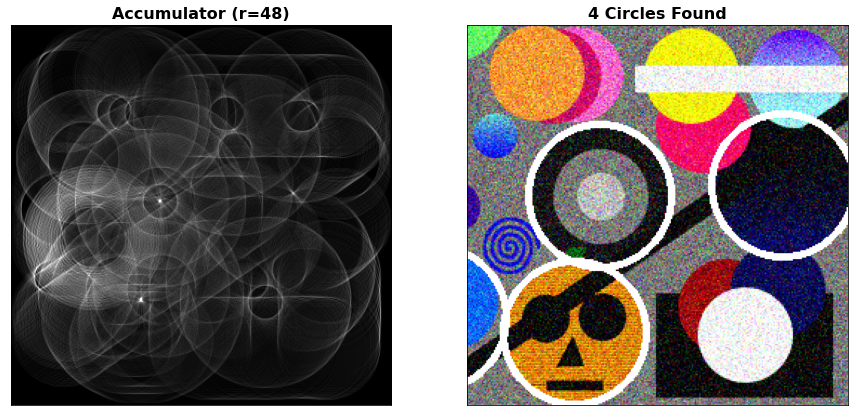

In [610]:
# LARGE CIRCLES
r = 48

a_48 = Accumulator(r, canny)
a_48.accumulate()

num_centers = 4
for _ in range(num_centers):
    a_48.find_maximum()
print("Centers:", a_48.centers)

f_img = circles.copy()
for c in a_48.centers:
    f_img = cv2.circle(f_img, (c[0]-r, c[1]-r), r, (255, 255, 255), 3)

plt.subplot(121)
plt.imshow(a_48.data, cmap="gray", vmin=0, vmax=90)
just_title(f"Accumulator (r={r})")

plt.subplot(122)
plt.imshow(f_img)
just_title(f"{len(a_48.centers)} Circles Found")

plt.show()

# finds all 3 in 4 guesses (1 false positive)!

##### Part B: Write-up

<span style="color:red">Not having seen the code of the "vanilla Hough transform", I can't say for sure if I made any improvements or optimizations. However, there are a few parts of my implementation that I am proud of. First, I used the Canny edge detector, and some simple image blurring and denoising. Then, the fact that I used the cv2.circle() method to make some "stamps" that I can then just add onto the accumulator. This makes it so that I don't have to trace a circle 360 degrees around a point manually while accumulating.</span>

<span style="color:red">To deal with the edges of the accumulator, I multiplied the edges on a linear scale from 1-3, with 1 being at a distance r (circle radius) inside the image edge, 2 on the image edge, and 3 at the accumulator edge (distance r outside the image edge). This increases linearly and smoothly from inside out.</span>

<span style="color:red">Another thing that took me a while to figure out was the right kernel to use for manually finding local maxima. It took many tries until I decided on the best one, which results in all 20 circles being found in a total of 22 guesses (so just 2 false positives)! One efficiency improvement that I made to this process is that the local maxima kernel is only run over the accumulation array the first time that a maximum is requested. This 'local maximum array' is stored in the class, and the area around where the maximum was found is set to 0.</span>